In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [2]:
data = pd.read_csv('Retail.csv')

In [3]:
data.head(10)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,Nan,809.7600,809.7600,0.0,64.7808,20.2440
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746


In [4]:
data.shape

(32040, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32040 entries, 0 to 32039
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderNumber     32040 non-null  object 
 1   ProductName     32040 non-null  object 
 2   Color           29073 non-null  object 
 3   Category        32040 non-null  object 
 4   Subcategory     32040 non-null  object 
 5   ListPrice       32032 non-null  float64
 6   Orderdate       32040 non-null  object 
 7   Duedate         32040 non-null  object 
 8   Shipdate        32040 non-null  object 
 9   PromotionName   32040 non-null  object 
 10  SalesRegion     32025 non-null  object 
 11  OrderQuantity   32026 non-null  object 
 12  UnitPrice       32040 non-null  float64
 13  SalesAmount     32040 non-null  float64
 14  DiscountAmount  32040 non-null  float64
 15  TaxAmount       32040 non-null  float64
 16  Freight         32040 non-null  float64
dtypes: float64(6), object(11)
memor

In [6]:
data[["Orderdate", "Duedate", "Shipdate"]] = data[["Orderdate", "Duedate", "Shipdate"]].apply(pd.to_datetime)
data["OrderQuantity"]=data["OrderQuantity"].astype(float).astype('Int64')
data.dtypes

OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
dtype: object

In [7]:
data.nunique()

OrderNumber       1871
ProductName        250
Color                8
Category             4
Subcategory         33
ListPrice          103
Orderdate           17
Duedate             17
Shipdate            17
PromotionName        7
SalesRegion         10
OrderQuantity       37
UnitPrice          214
SalesAmount       1271
DiscountAmount     382
TaxAmount         1271
Freight           1266
dtype: int64

In [8]:
data.describe()

,ListPrice,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
count,32032.000000,32024.000000,32040.000000,32040.000000,32040.00000,32040.000000,32040.000000
mean,714.663419,3.626468,424.122103,1299.023131,8.15285,103.921849,32.475594
std,851.623778,3.116480,506.799303,2153.316625,78.40708,172.265331,53.832916
min,2.290000,1.000000,1.328200,1.374000,0.00000,0.109900,0.034400
25%,54.990000,2.000000,32.994000,125.964000,0.00000,10.077100,3.149100
50%,337.220000,3.000000,202.332000,445.410000,0.00000,35.632800,11.135300
75%,1079.990000,5.000000,647.994000,1457.820000,0.00000,116.625600,36.445500
max,3578.270000,40.000000,2146.962000,27893.619000,4005.23760,2231.489500,697.340500


In [9]:
data['OrderQuantity'].fillna(1, inplace=True)

In [10]:
data.ListPrice = data.groupby('ProductName')['ListPrice'].apply(lambda x: x.fillna(x.mean()))

In [11]:
data.ListPrice.isnull().sum()

0

In [12]:
data = data[data['SalesRegion'].notna()]

In [13]:
data['SalesRegion'].isnull().sum()

0

In [14]:
#removing outliers from data:

print(data['SalesAmount'].mean(), data['SalesAmount'].std(), data['SalesAmount'].mean() - 3 * data['SalesAmount'].std(), data['SalesAmount'].mean() + 3 * data['SalesAmount'].std())
data = data[data['SalesAmount'] < (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
data = data[data['SalesAmount'] > (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]

1298.8642341233315 2153.181910775347 -5160.68149820271 7758.409966449373


In [15]:
data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()

,Category,OrderQuantity
0,Accessories,14355
1,Bikes,31987
2,Clothing,35549
3,Components,28148


<AxesSubplot:xlabel='Category', ylabel='ListPrice'>

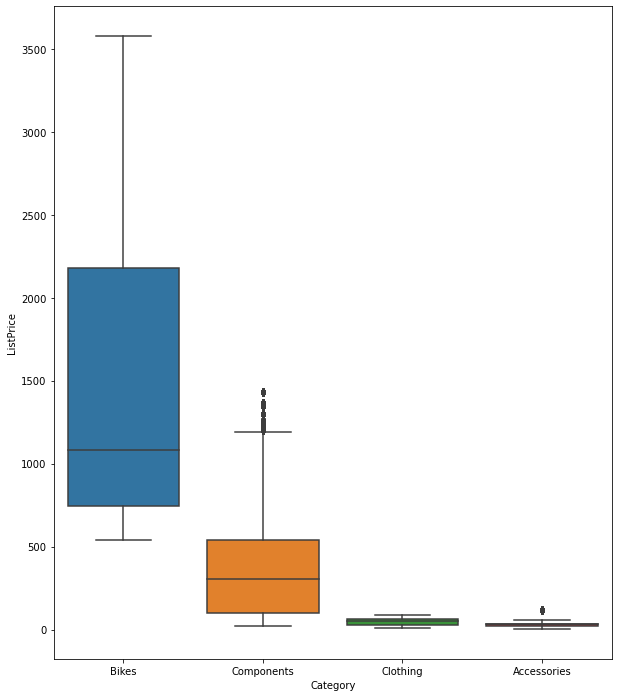

In [16]:
plt.figure(figsize =(10, 12)) 
sns.boxplot(y= data['ListPrice'], x = data['Category'])

**Analysis:**The box plot shows that List Price of Bikes is very high compared to the rest of the categories. This makes sense because the price of bikes would be a lot more than accessories and clothes. We can also see that the bike List price is positively skewed. This means that most of the bike prices are more than the median price.

In [17]:
#plt.figure(figsize =(10, 12)) 
#sns.boxplot(y= data['UnitPrice'], x = data['Category'])

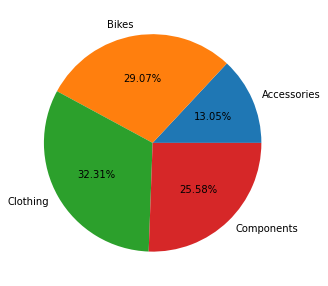

In [18]:
df = data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(8, 5)) 
plt.pie(df.OrderQuantity, labels = df.Category,autopct='%1.2f%%')
# show plot 
plt.show() 

**Analysis:** As can be observed from the charts, the highest number of products sold come from Clothing category followed by Bikes then components and then Accessories with the least number of products sold.



<AxesSubplot:xlabel='Category', ylabel='SalesAmount'>

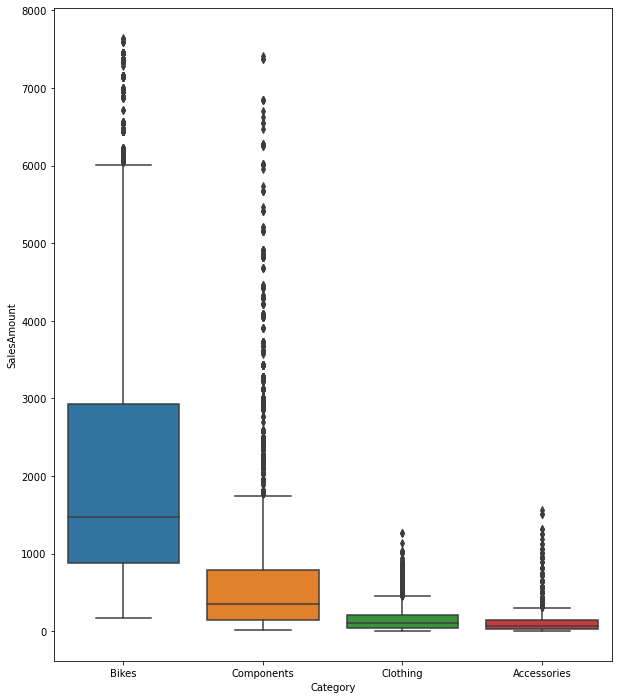

In [19]:
plt.figure(figsize =(10, 12)) 
sns.boxplot(y= data['SalesAmount'],x=data['Category'])

In [20]:
data.groupby(['Category'])['SalesAmount'].apply(lambda x: x.max()).to_frame().rename(columns={'SalesAmount':'max_catg_sales_amnt'})

,max_catg_sales_amnt
Category,
Accessories,1566.0000
Bikes,7642.6382
Clothing,1259.8200
Components,7418.0918


In [21]:
data.groupby(['Category'])['SalesAmount']

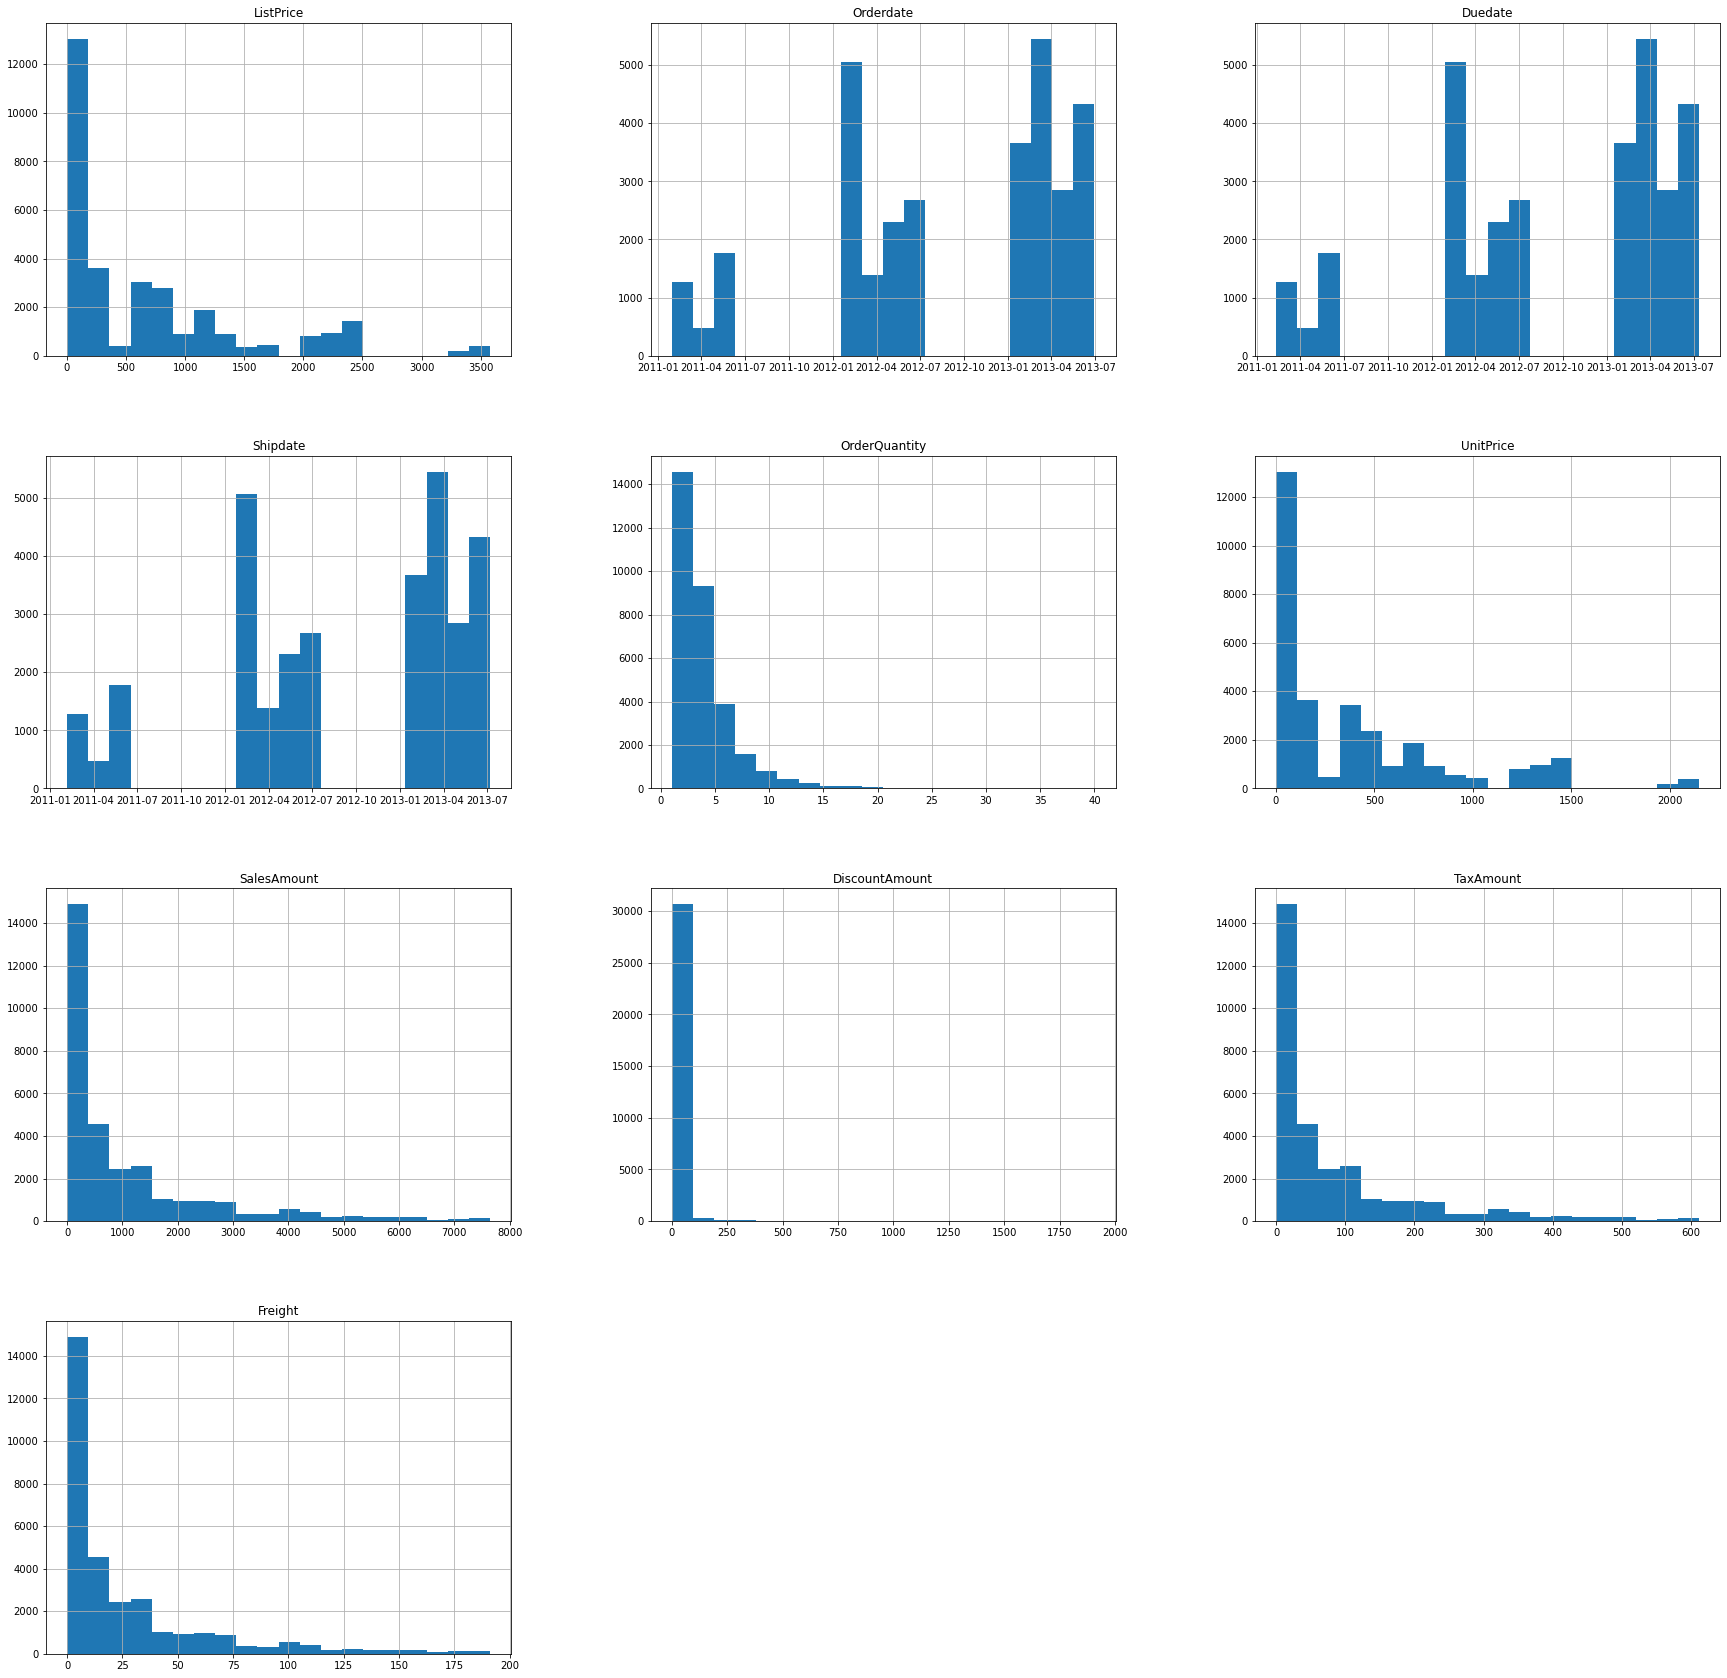

In [22]:
# Plot the histograms of each 
data.hist(bins=20, figsize=(30,30))
plt.show()

**Analysis:** From the above histograms we can make some conclusions:

    1.Most of the Products have been ordered without any discount i.e. at full price.
    2.Most of the orders have a very low freight amount charged.
    3.The list Price and Unit Price are following the same pattern.The prices are also very similar in both histograms.
    4.Most of the orders have 1-2 products of each kind. Many orders also have upto 7 same products but more than that is quite       rare.
    5.Sales amount, tax amount and Freight are following the same trends and most of the orders have comparatively low sales           amount (less than $1000) and hence low tax amount and freight applied on them.


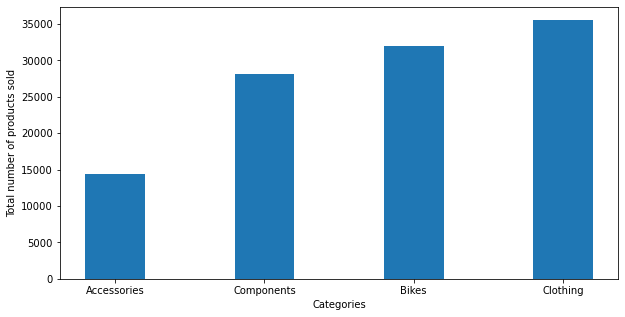

In [23]:
df=df.sort_values('OrderQuantity')
fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(df.Category, df.OrderQuantity, width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total number of products sold")  

plt.show() 

**Analysis:** As can be observed from the charts, the highest number of products sold come from Clothing category followed by bikes then components and then Accessories with the least number of products sold.

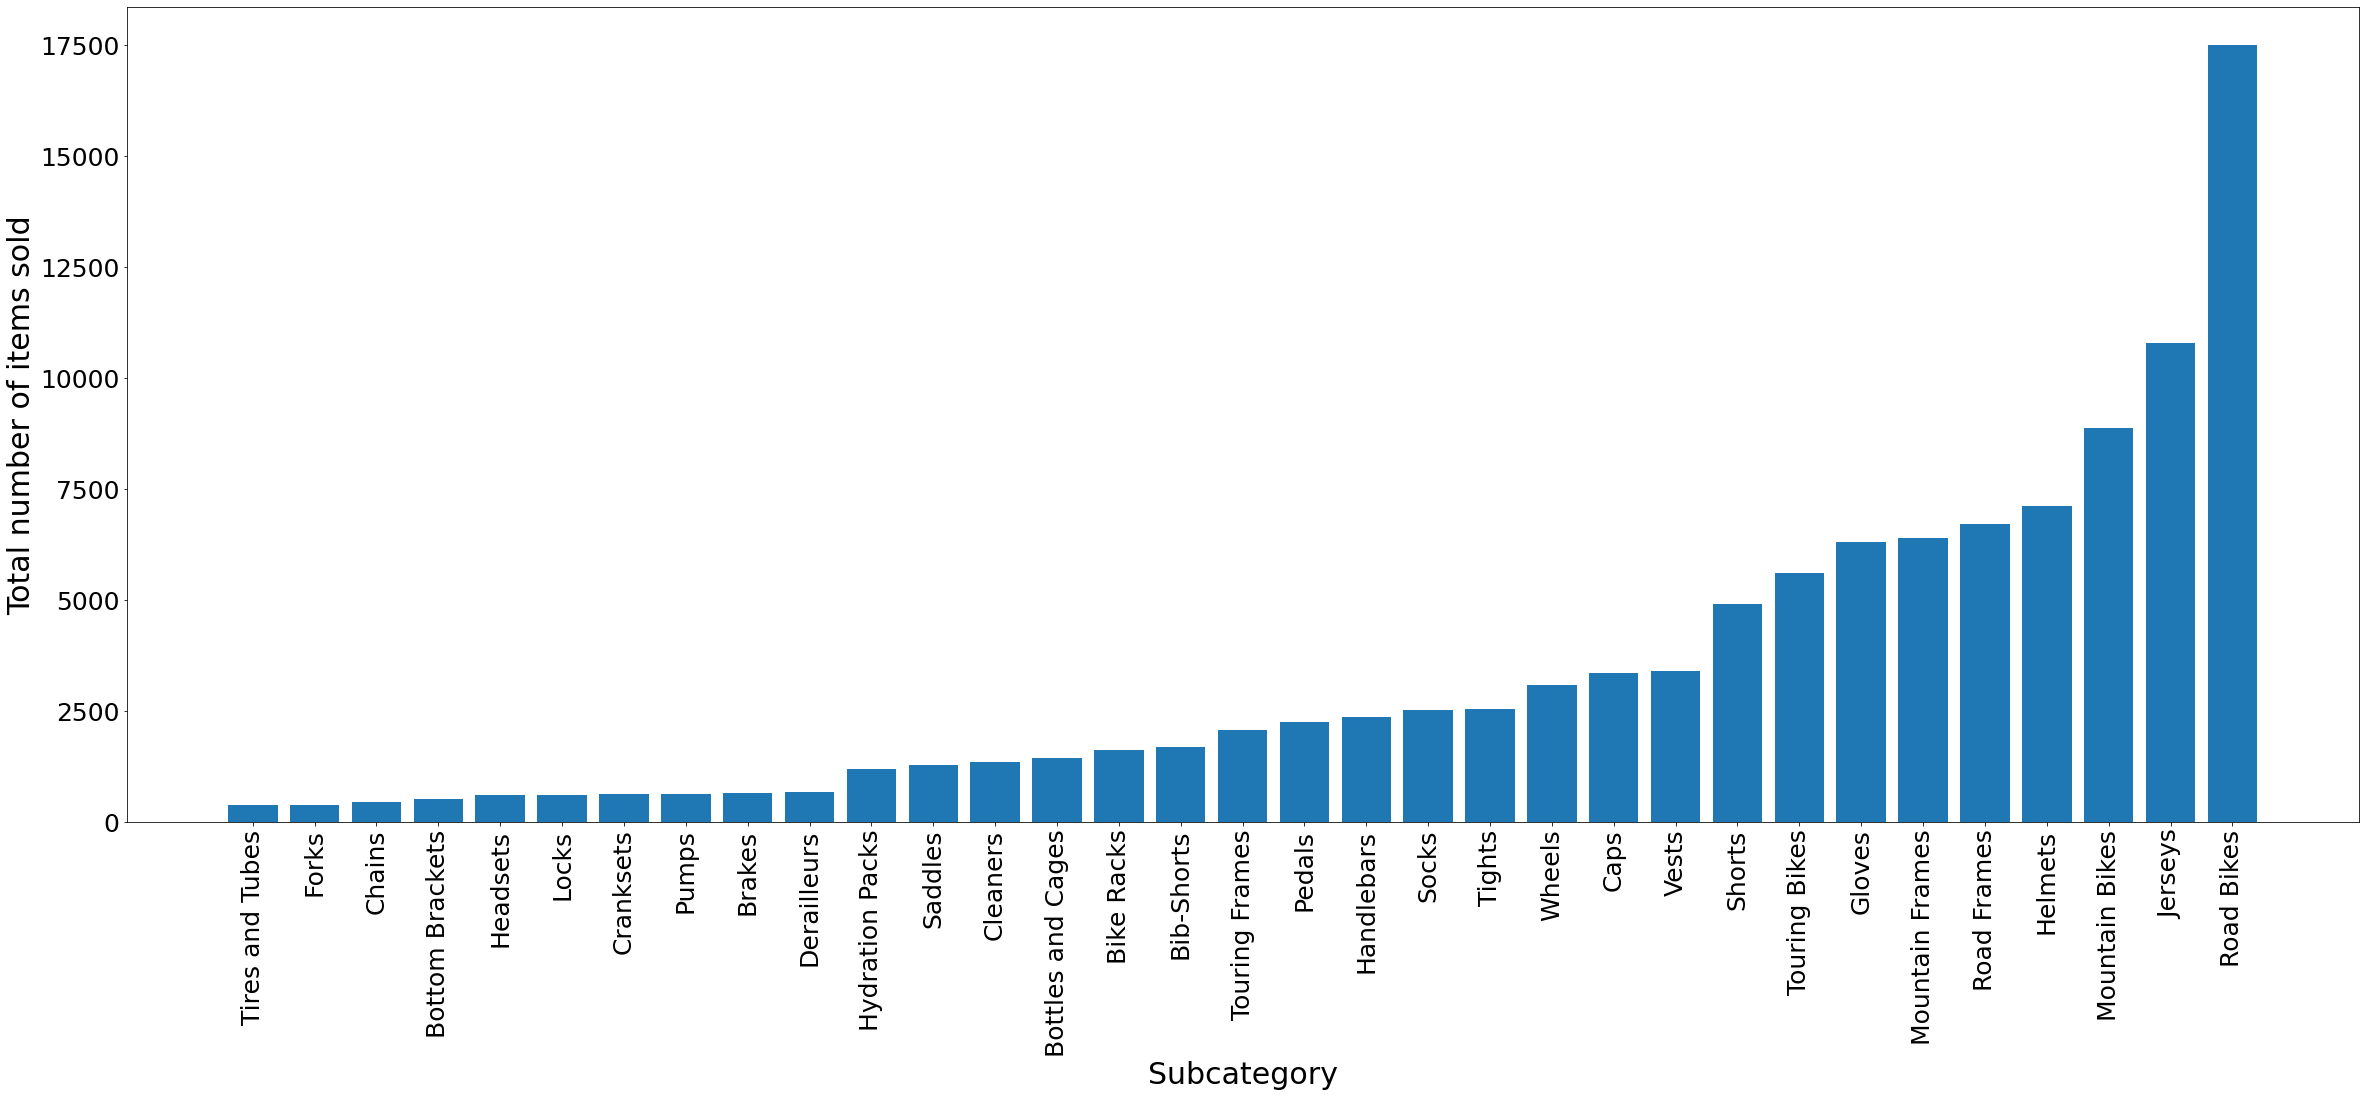

In [24]:
#subcategory

df1 = data.groupby(['Subcategory']).agg({'OrderQuantity':np.sum}).reset_index()
df1=df1.sort_values('OrderQuantity')
fig = plt.figure(figsize = (40, 15)) 
plt.bar(df1.Subcategory, df1.OrderQuantity)
plt.xlabel("Subcategory",fontsize=30) 
plt.ylabel("Total number of items sold",fontsize=30)


plt.yticks(fontsize=25)
plt.xticks(fontsize=25,rotation = 90)
# show plot 
plt.show() 

**Analysis:** If we zoom in we can observe that the sub category with highest number of products sold is Road Bikes followed by jerseys and then mountain bikes. The sub cetgories with the least number of products sold are tire tubes and forks.

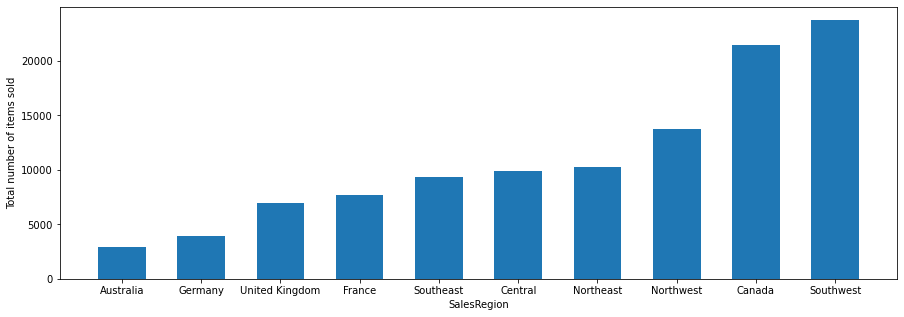

In [25]:
#Region

df2 = data.groupby(['SalesRegion']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')
fig = plt.figure(figsize = (15, 5)) 
plt.bar(df2.SalesRegion, df2.OrderQuantity, width = 0.6)
plt.xlabel("SalesRegion") 
plt.ylabel("Total number of items sold")  
# show plot 
plt.show() 

**Analysis:** Here we see the highest number of products sold are in Southwest, Canada and then Northwest whereas the least number of products sold are in Australia and European countries like Germany and UK.


              PromotionName  OrderQuantity
1        Road-650 Overstock            169
2    Touring-1000 Promotion            484
3    Touring-3000 Promotion           1223
6  Volume Discount 25 to 40           1346
5  Volume Discount 15 to 24           6076
4  Volume Discount 11 to 14           7984


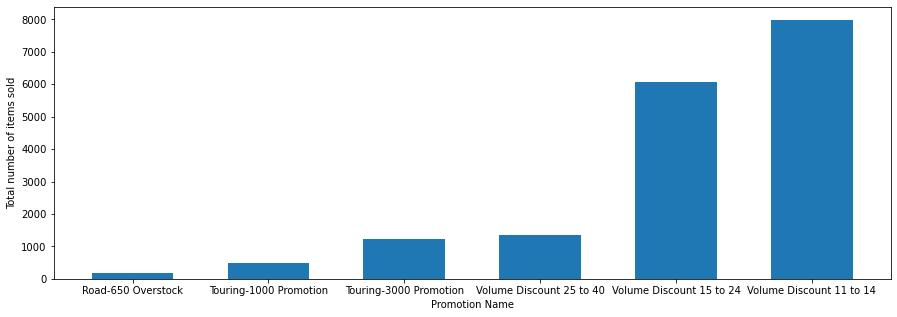

In [26]:
#Promotion
df_pro = data.groupby(['PromotionName']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')

#Filter data
promotionData = df_pro[df_pro.PromotionName != 'No Discount']
print(promotionData)

#Plot bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(promotionData.PromotionName, promotionData.OrderQuantity,width = 0.6)
plt.xlabel("Promotion Name") 
plt.ylabel("Total number of items sold")  

# show plot 
plt.show()

**Analysis:** Highest number of products sold are under the discount, 'Volume Discount 11 to 14' followed closely by 'Volume Discount 15 to 24' after which there is a stark decrease in products sold under discounts with least number of products sold under the discount 'Road-650 Overstock'.


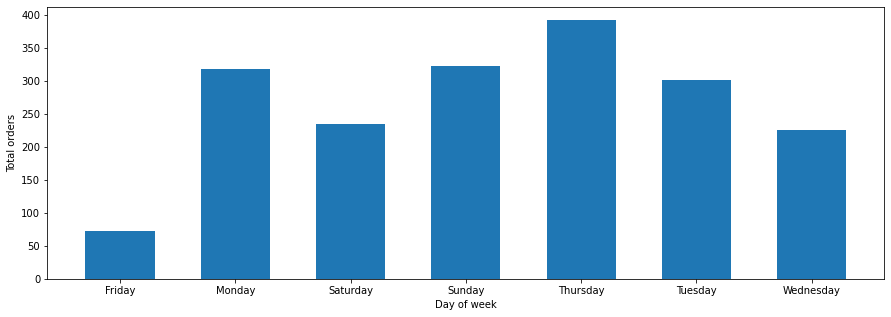

In [29]:
df_o = data.groupby(['Orderdate', 'OrderNumber']).size()
new_df = df_o.to_frame(name = 'size').reset_index()
new_df['NumberofOrders']=1
new_df['day_of_week'] = new_df['Orderdate'].dt.day_name()
datasales = new_df.groupby('day_of_week')['NumberofOrders'].agg('sum').reset_index()

# #plotting bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(datasales.day_of_week, datasales.NumberofOrders, width = 0.6)
plt.xlabel("Day of week") 
plt.ylabel("Total orders") 
plt.show()


**Analysis:** There are more orders placed on weekdays than weekends with the highest number of orders being placed on Thursdays. The trend drops to the least number of orders plcaed on Friday after which it picks up on Saturday and Sunday.

Index(['PromotionName', 'OrderQuantity'], dtype='object')


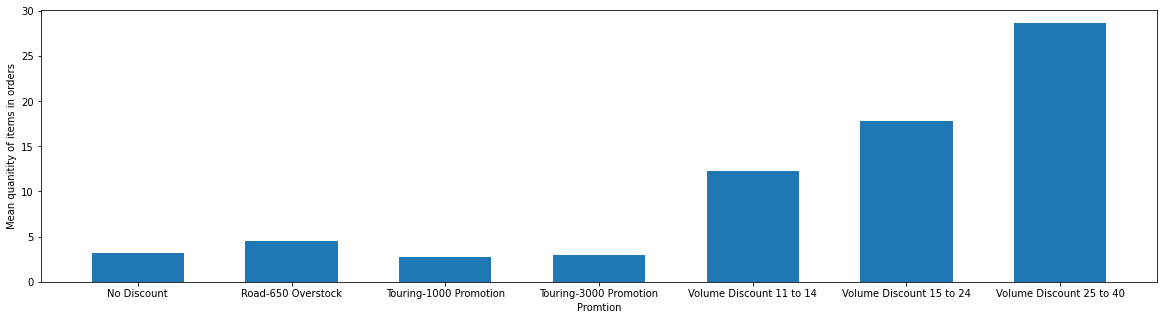

In [30]:
df_promo = data.groupby(['PromotionName'], as_index=False).agg({'OrderQuantity': ['mean']})
df_promo.columns = df_promo.columns.droplevel(1)
df_promo.head(10)
print(df_promo.columns)

#plot bar chart
fig = plt.figure(figsize = (20, 5))
plt.bar(df_promo.PromotionName, df_promo.OrderQuantity, align='center', width=0.6)
plt.xlabel("Promtion") 
plt.ylabel("Mean quanitity of items in orders") 
plt.show()



**Analysis:** As we can see, the number of average quanitites in an order increases overall when there is a promotion as compared to without any discount. We can also see discount 25 to 40 having most order quantities followed by vol 15 to 20 and then vol 11 to 14. Hence, promotions have a positive impact on product sales.


In [31]:
data['ProcessingDays'] = (data['Shipdate']-data['Orderdate'])
data['ProcessingDays'] = data['ProcessingDays'].astype('timedelta64[D]').astype(int)
data.dtypes

OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
ProcessingDays             int32
dtype: object

The mean processing days are 7.0


<AxesSubplot:ylabel='ProcessingDays'>

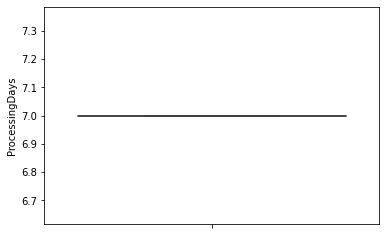

In [32]:
meanProcessingdays = data['ProcessingDays'].mean()
print("The mean processing days are", meanProcessingdays)
sns.boxplot(y=data['ProcessingDays'])

**Analysis:** The average processing time is 7 days and there is no deviation from it.

In [33]:
df = data.groupby(['OrderNumber'], sort=False).size().reset_index(name='Count')
df['Count'].describe()

count    1866.000000
mean       16.737942
std        16.411185
min         1.000000
25%         3.000000
50%        10.000000
75%        27.000000
max        68.000000
Name: Count, dtype: float64

<AxesSubplot:ylabel='Count'>

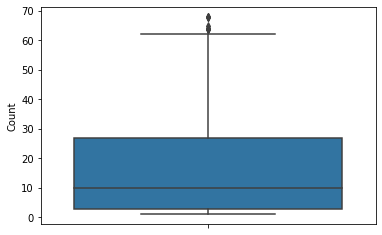

In [34]:
sns.boxplot(y= df['Count'])

**Analysis:** The above box plot shows that the median of the number of products in an order is 10 and the mean is 16.7 therefore we see the box plot positively skewed. The maximum number of products in an order are 68 and this is considered an outlier.

In [35]:
#z-score normalization
data['NormalizedPrice'] = data.iloc[:,5:6].apply(lambda x:(x-x.mean())/x.std(),axis=0)
data.head()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,ProcessingDays,NormalizedPrice
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,7,3.409273
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497,7,3.378086
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,7,0.670221
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,7,0.670221
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675,7,0.870036


(array([20588.,  6057.,  1793.,  2210.,   585.]),
 array([1.32820000e+00, 4.30454960e+02, 8.59581720e+02, 1.28870848e+03,
        1.71783524e+03, 2.14696200e+03]),
 <BarContainer object of 5 artists>)

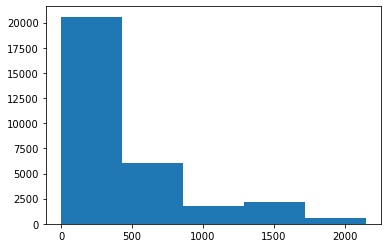

In [36]:
plt.hist(data.UnitPrice, bins=5)

In [37]:
data['ListPrice'].mean()

667.0660321801648

Analysis:The histogram is not following a normal distribution, rather it is right-skewed.

(array([1643., 3745., 7658., 9895., 8292.]),
 array([0.28382464, 1.76142153, 3.23901842, 4.71661532, 6.19421221,
        7.6718091 ]),
 <BarContainer object of 5 artists>)

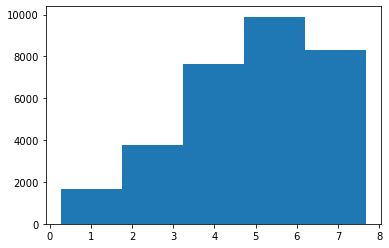

In [38]:
plt.hist(np.log(data.UnitPrice), bins=5)

Analysis:Now the histogram is a bit left-skewed now but the skew is much more gentle than before.

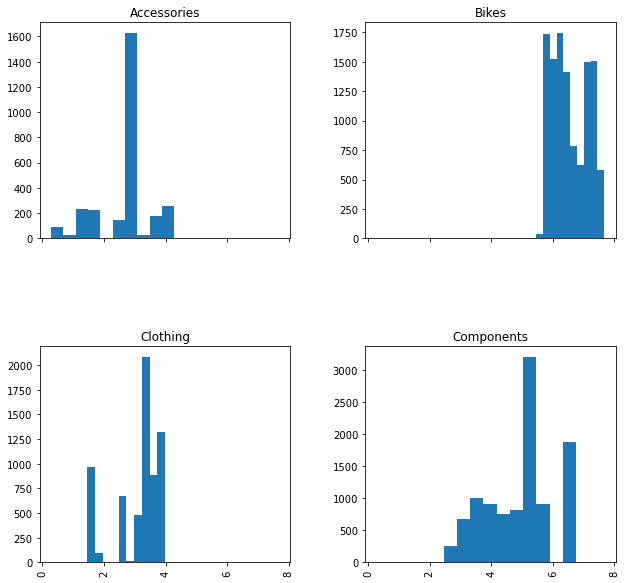

In [39]:
plot_test=np.log(data.UnitPrice).hist(by=data['Category'],sharex=True,figsize=(10,10), bins=10)  


<AxesSubplot:xlabel='Category', ylabel='UnitPrice'>

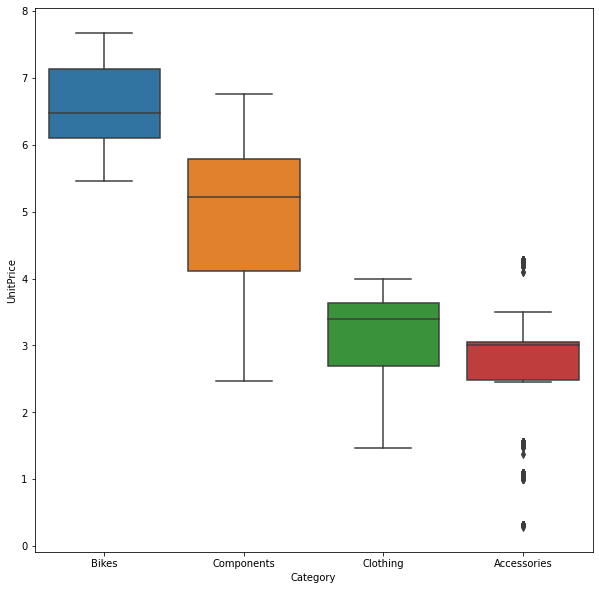

In [40]:
plt.figure(figsize =(10, 10)) 
sns.boxplot(y=np.log(data.UnitPrice), x = data['Category'])

Analysis:The bikes and components data are to some extent normally distributed as can be seen from the box plots but components is slightly left-skewed. The Accessories data is heavily left-skewed and also has many outliers, whereas clothing is negatively skewed.

In [41]:
df = data.drop('ProcessingDays', 1)
df = df.drop('NormalizedPrice', 1)
corr_matrix = df.corr()
cor_target=corr_matrix
cor_target

C:\Users\Pranathi\AppData\Local\Temp\ipykernel_10184\2836422903.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = data.drop('ProcessingDays', 1)
C:\Users\Pranathi\AppData\Local\Temp\ipykernel_10184\2836422903.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('NormalizedPrice', 1)


,ListPrice,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
ListPrice,1.000000,-0.229128,0.996780,0.769445,0.111123,0.769445,0.769445
OrderQuantity,-0.229128,1.000000,-0.230318,0.096628,0.111333,0.096628,0.096628
UnitPrice,0.996780,-0.230318,1.000000,0.772700,0.048769,0.772700,0.772700
SalesAmount,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000
DiscountAmount,0.111123,0.111333,0.048769,0.110071,1.000000,0.110071,0.110071
TaxAmount,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000
Freight,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000


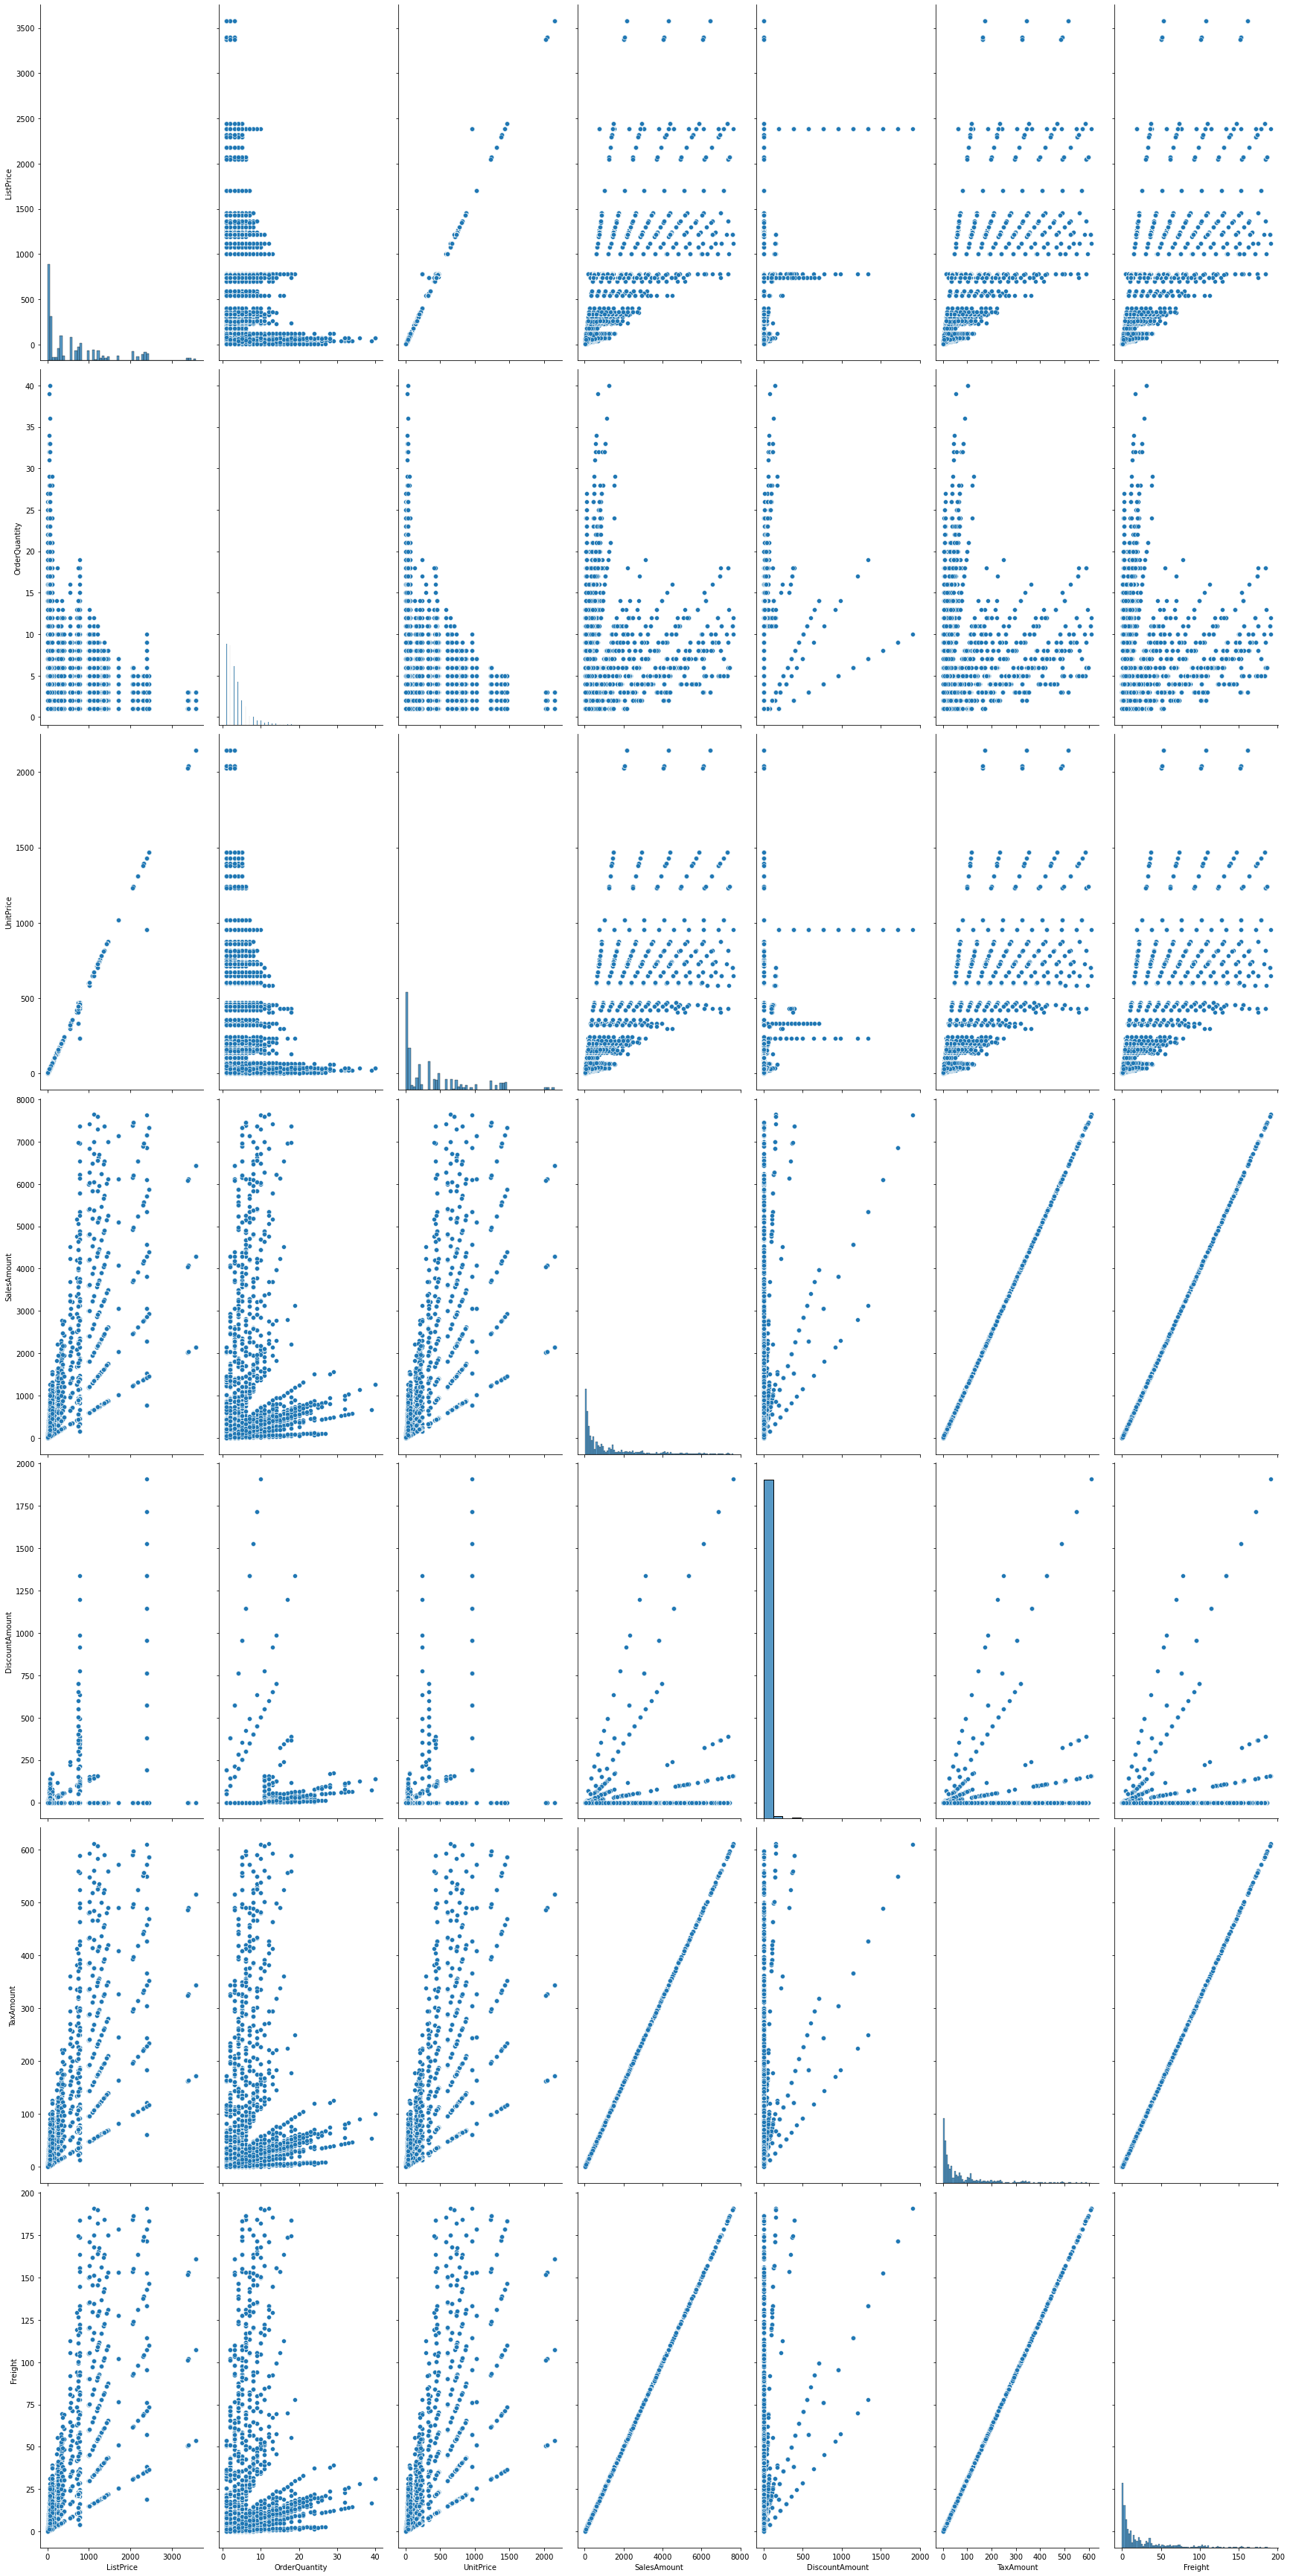

In [44]:
#Scatter plot
data_copy=df.copy()
fig.set_size_inches(20,10)
sns.pairplot(data_copy,height=7,aspect=0.5)

<AxesSubplot:>

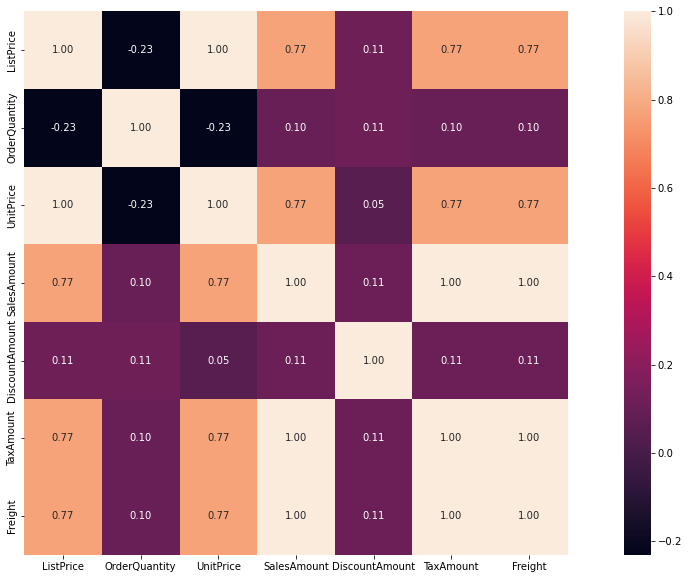

In [50]:
#Heatmap
corrmat =df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

Analysis:

List Price and Unit Price are positively correlated. If we analyze our data, we can see that the unit price is always approximately 0.6x the List Price.
Sales amount, tax amount and freight charges are also positively correlated with one another. If we analyze our data, we can see that the tax amount is always 8% of the Sales amount and the freight is 2.5% of the Sales amount.


The sales amount also has a positive corelation with Unit Price and ListPrice as the higher the prices of individual products, the more the total sales amount.
Unit Price and Order Quantity have a negative correlation although it is not very strong. The negative correlation would make sense as the higher the price, the lower the quantity of products you would buy.